# Comparing RNN, LSTM, and GRU for Text Sentiment Analysis

Github:

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords

In [2]:
# Load dataset
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  int64 
 2   cleaned_review  50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [27]:
df.describe()

,sentiment
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [6]:
# Data Preprocessing
nltk.download('stopwords')
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df['cleaned_review'] = df['review'].apply(clean_text)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Exploratory Data Analysis


<ipython-input-8-c4ee4924451f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='viridis')


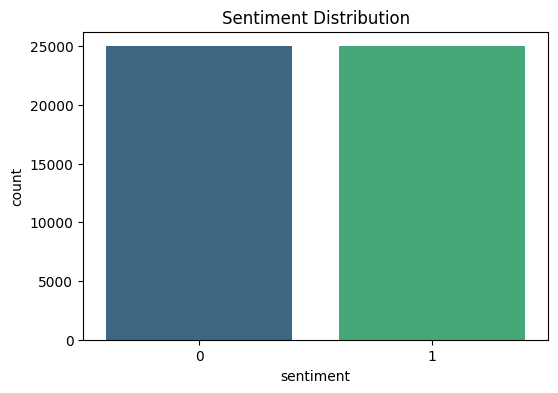

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentiment'], palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

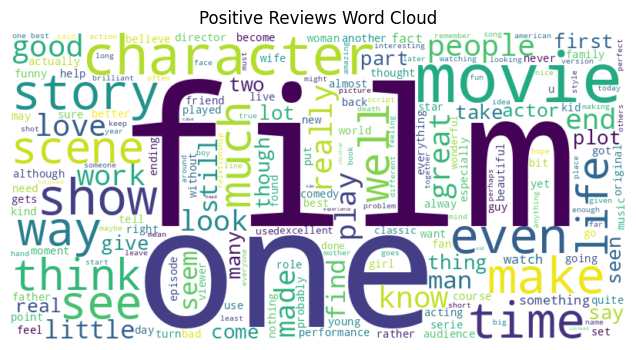

In [9]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[df['sentiment'] == 1]['cleaned_review']))
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews Word Cloud")
plt.show()

In [10]:
# Tokenization and Padding
max_words = 10000
max_len = 200
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_review'])
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])
X = pad_sequences(sequences, maxlen=max_len)
y = df['sentiment'].values

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Model Training
embedding_dim = 32

In [13]:
# Simple RNN Model
rnn_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    SimpleRNN(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.6255 - loss: 0.6109 - val_accuracy: 0.8411 - val_loss: 0.3589
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.8728 - loss: 0.3174 - val_accuracy: 0.8482 - val_loss: 0.3606
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.8717 - loss: 0.3095 - val_accuracy: 0.8587 - val_loss: 0.3595


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.9143 - loss: 0.2245 - val_accuracy: 0.8491 - val_loss: 0.3913
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9043 - loss: 0.2346 - val_accuracy: 0.8278 - val_loss: 0.4269
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9576 - loss: 0.1217 - val_accuracy: 0.8266 - val_loss: 0.4926


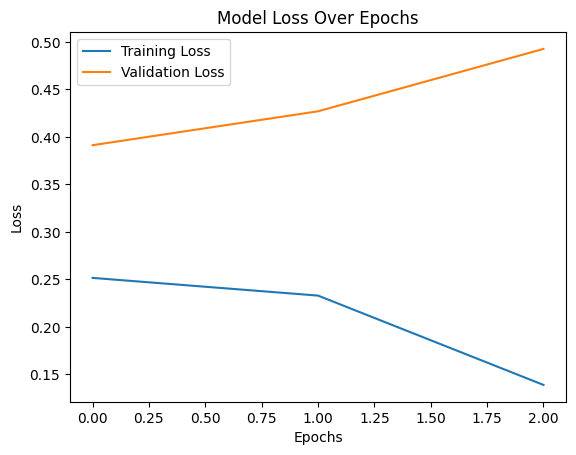

In [29]:
# Train the model and store the history
history = rnn_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

In [14]:
# LSTM Model
lstm_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 117ms/step - accuracy: 0.7832 - loss: 0.4475 - val_accuracy: 0.8908 - val_loss: 0.2700
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - accuracy: 0.9166 - loss: 0.2225 - val_accuracy: 0.8898 - val_loss: 0.2682
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.9362 - loss: 0.1745 - val_accuracy: 0.8846 - val_loss: 0.2948


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.9486 - loss: 0.1393 - val_accuracy: 0.8789 - val_loss: 0.3254
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.9607 - loss: 0.1115 - val_accuracy: 0.8733 - val_loss: 0.3916
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.9736 - loss: 0.0781 - val_accuracy: 0.8646 - val_loss: 0.3935


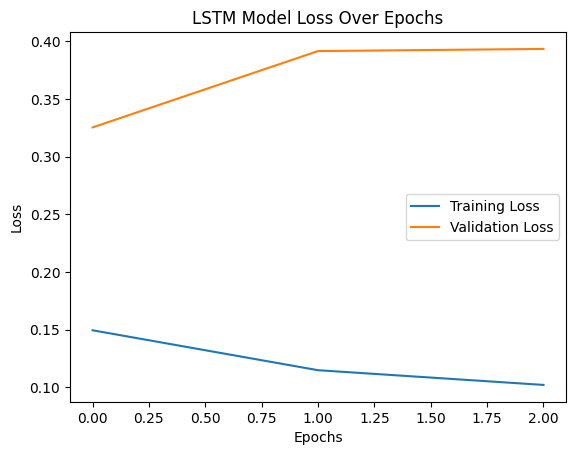

In [30]:
# Train the model and store the history
history = lstm_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.legend()
plt.show()

In [15]:
# GRU Model
gru_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    GRU(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 155ms/step - accuracy: 0.7328 - loss: 0.4939 - val_accuracy: 0.8847 - val_loss: 0.2832
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 134ms/step - accuracy: 0.9104 - loss: 0.2358 - val_accuracy: 0.8817 - val_loss: 0.2803
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 128ms/step - accuracy: 0.9309 - loss: 0.1862 - val_accuracy: 0.8836 - val_loss: 0.2899


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 138ms/step - accuracy: 0.9731 - loss: 0.0834 - val_accuracy: 0.8725 - val_loss: 0.3591
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 130ms/step - accuracy: 0.9822 - loss: 0.0619 - val_accuracy: 0.8716 - val_loss: 0.4509
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 129ms/step - accuracy: 0.9858 - loss: 0.0486 - val_accuracy: 0.8712 - val_loss: 0.5063


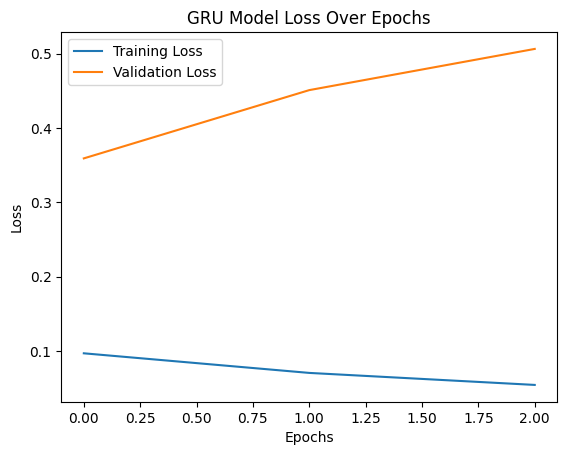

In [32]:
# Train the model and store the history
history = gru_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GRU Model Loss Over Epochs')
plt.legend()
plt.show()

In [16]:
# Evaluation
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")
print("LSTM Model Classification Report:\n", classification_report(y_test, y_pred_lstm))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
LSTM Model Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



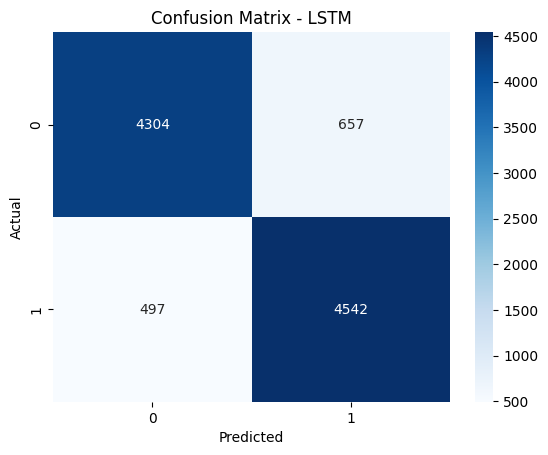

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()

In [25]:
# Final Prediction
def predict_sentiment(review):
    review = clean_text(review)
    seq = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(seq, maxlen=max_len)
    prediction = lstm_model.predict(padded)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"


def predict_batch_sentiments(reviews):
    cleaned_reviews = [clean_text(review) for review in reviews]
    sequences = tokenizer.texts_to_sequences(cleaned_reviews)
    padded = pad_sequences(sequences, maxlen=max_len)
    predictions = lstm_model.predict(padded)
    return ["Positive" if pred > 0.5 else "Negative" for pred in predictions]

print(predict_sentiment("This movie was fantastic! Best I have seen in years."))
print(predict_batch_sentiments(["A must watch film!", "Terrible experience, never again.", "Absolutely loved it, so emotional."]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
['Positive', 'Negative', 'Positive']
